<딥러닝 파이토치 교과서> ch5. p.166~179

---
# 5. 합성곱 신경망 1
### 5.1. 합성곱 신경망
#### 5.1.1 합성곱층의 필요성
#### 5.1.2 합성곱 신경망 구조
- 입력층
- 합성곱층
- 풀링층
- 완전연결층
- 출력층

#### 5.1.3 1D, 2D, 3D 합성곱
- 1D 합성곱
- 2D 합성곱
- 3D 합성곱
- 3D 입력을 갖는 2D 합성곱
- 1x1 합성곱
---

# 5. 합성곱 신경망 1



## 5.1. 합성곱 신경망
- 딥러닝의 역전파에선 순전파 과정에 따라 계산된 오차 정보가 신경망의 모든 노드(출력층-> 은닉층-> 입력층)으로 전송
- 이런 계산 과정은 복잡하고 CPU, GPU, 메모리와 같은 자원을 요구
- 계산 시간이 오래 걸림.
- 이 문제를 해결하기 위해 **합성곱 신경망(CNN)** 사용.
- 합성곱 신경망은 이미지 전체를 한번에 계산하는 것이 아니라 이미지의 국소적인 부분을 계산함으로써 시간과 자원을 절약하여 이미지의 세밀한 부분까지 분석 할 수 있도록 함.

### 5.1.1 합성곱층의 필요성
- 합성곱 신경망은 이미지, 영상 처리에 유용
- 이미지 분석은 3x3 배열을 펼쳐서 각 픽셀에 가중치를 곱하여 은닉층으로 전달
- 이렇게 하면 데이터의 공간적인 구조를 무시하게 됨.
- 합성곱층은 이를 방지하여 데이터의 공간적인 구조를 반영함.
- 합성곱층은 컬러 이미지 같은 다차원 배열 처리에 특화되어 있음.
- 음성인식, 이미지.영상 인식에 주로 사용됨.
- Flattening 시각화


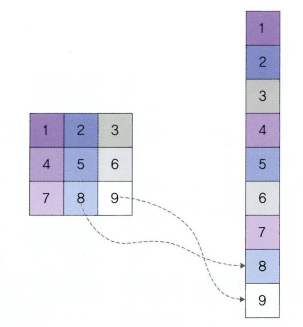

### 5.1.2 합성곱 신경망 구조


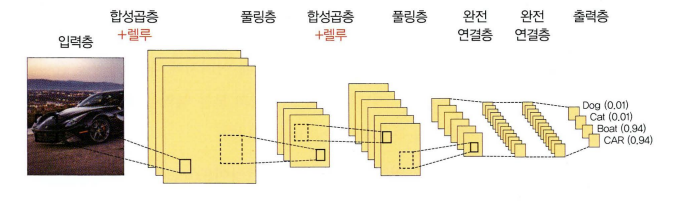

[단계별 역할 요약]
- 합성곱층 + 풀링층: 입력 이미지의 주요 특성 벡터를 추출
- 완전 연결층: 1차원 벡터로 변환
- 출력층: 활성화 함수인 소프트맥스 함수를 사용하여 최종 결과가 출력됨.

####**입력층 (Input Layer)**
- 입력 이미지 데이터가 최초로 거치는 단계
- 단순 1차원의 데이터 X
- 높이, 너비, 채널의 값을 가지는 3차원 데이터 O
   - gray scale이면 채널이 1 값을 가짐.
   - rgb color이면 채널이 3 값을 가짐.
- 이미지 형태 (4, 4, 3)는 RGB를 가짐.

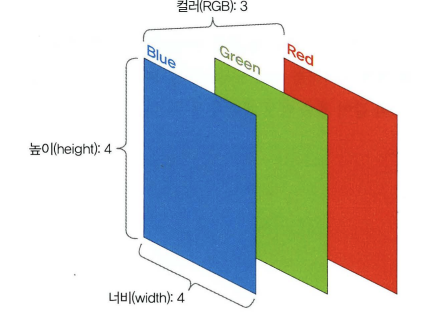

####**합성곱층 (Convolutional Layer)**
- 입력 데이터의 특성을 추출
- 특성 추출은 **커널(kernel)/필터**를 사용
- 커널/필터가 이미지의 모든 영역을 훑으면서 특성을 추출하면 **특성 맵(feature map)**이 완성됨.
- 커널은 일반적으로 3x3, 5x5 크기로 적용됨.
- **스트라이드(stride)**를 지정하여 특정 간격을 따라 순차적으로 이동
- (ex.)
   - (6, 6, 1) 크기 이미지에 3x3 크기의 커널이 스트라이드 1 간격으로 이동하면서 합성곱 연산을 수행
   - 원본 (6, 6, 1) 크기가 (4, 4, 1) 크기의 특성 맵으로 줄어듦.

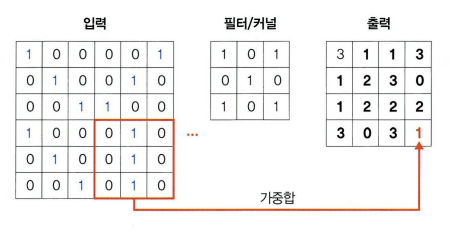

- 컬러 이미지의 합성곱
   - 필터 채널 값이 3.
   - 필터의 개수는 하나임을 주의.
   - RGB 각각에 서로 다른 가중치로 합성곱을 적용한 후 결과를 더해줌.


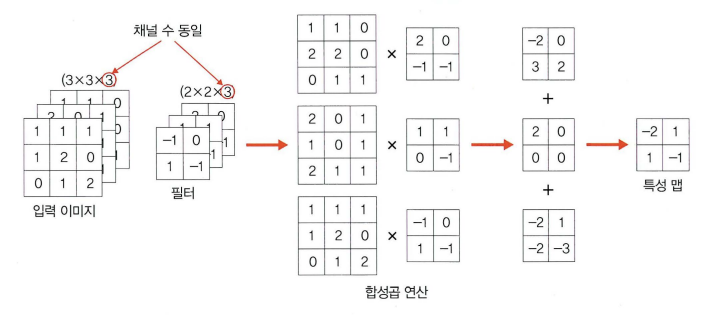

- 필터가 두 개 이상인 합성곱
   - 필터 각각이 특성 추출 결과의 채널이 됨.

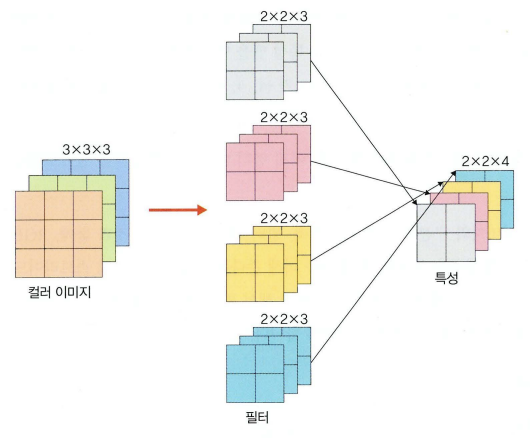

- 입력 데이터의 shape -> 합성곱층 -> 출력 데이터의 shape 요약

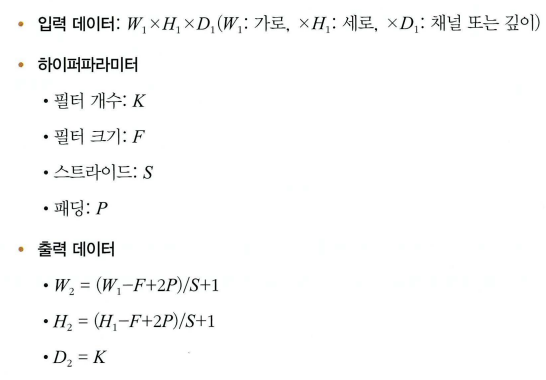

####**풀링층 (pooling layer)**
- 특성 맵의 차원을 다운 샘플링하여 연산량을 감소시킴.
- 그 결과 주요한 특성 벡터를 추출하여 학습을 효과적으로 할 수 있게 함.
- 다움 샘플링(sub-sampling)이란? 다음 그림과 같이 이미지를 축소하는 것

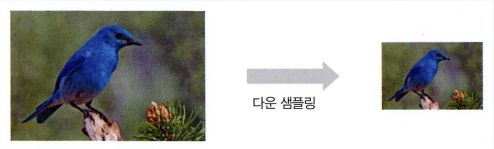

- 풀링 연산 두가지
   - 최대 풀링(max pooling): 대상 영역에서 최댓값을 추출. 대부분의 합성곱 신경망에는 최대 풀링이 사용됨.
   - 평균 풀링(average pooling): 대상 영역에서 평균을 반환. 각 커널 값을 평균화시켜 중요한 가중치를 갖는 값의 특성이 희미해질 수 있기 때문에 주로 최대 풀링을 사용.

- 최대풀링

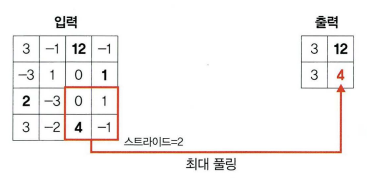

- 최대 풀링과 평균 풀링의 비교

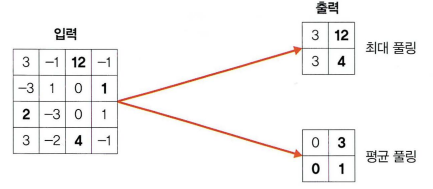

- 입력 데이터의 shape -> pooling -> 출력 데이터의 shape

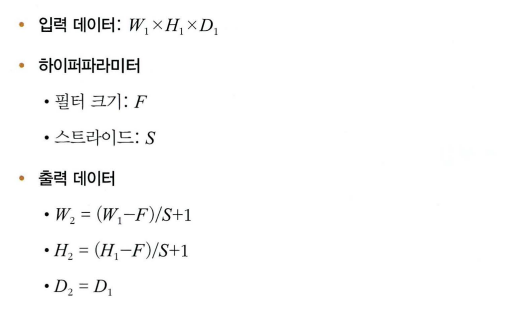

####**완전연결층 (fully connected layer)**
- n차원 벡터가 1차원 벡터로 펼쳐짐.
- Flattening

####**출력층(output layer)**
- 소프트맥스 활성화 함수를 거쳐 입력받은 값을 0~1 사이의 값으로 출력. 이는 이미지가 각 레이블에 속할 확률값
- 가장 높은 확률값을 갖는 레이블이 최종 값으로 선정됨.


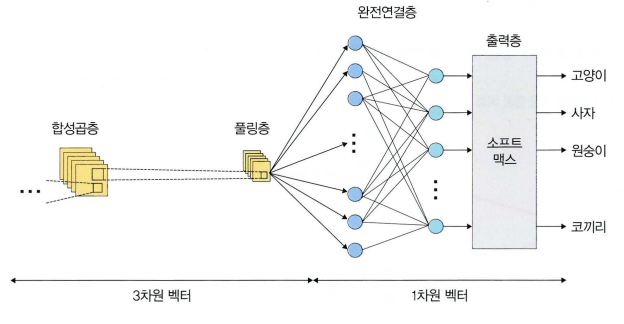

### 5.1.3 1D, 2D, 3D 합성곱
합성곱이 이동하는 방향의 수와 출력 형태에 따라 분류


####**1D 합성곱**
- 필터가 시간을 축으로 좌우로만 이동할 수 있는 합성곱
- 그래프 곡선을 완화할 때 많이 사용됨.
- 입력(W) -필터(k)-> 출력(W)

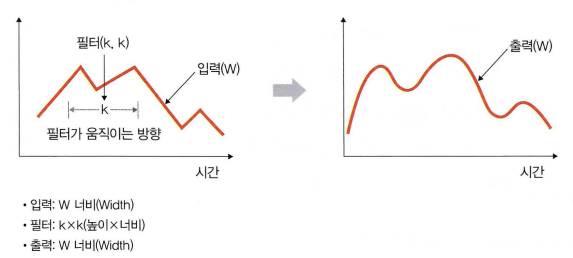

####**2D 합성곱**
- 필터가 방향 두 개로 움직이는 형태
- 입력(W, H) -필터(k, k)-> 출력(W, H)

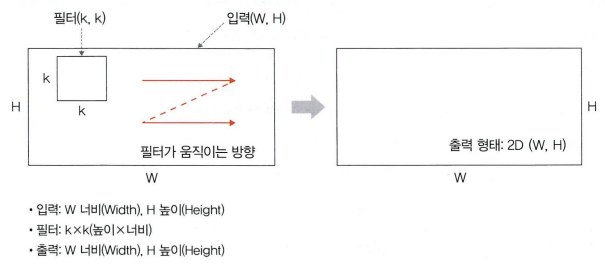

####**3D 합성곱**
- 필터가 세 개의 방향으로 움직임.
- 입력(W, H, L) -필터(k, k, d)-> 출력(W, H, L)
   - d < L로 유지하는 것이 중요

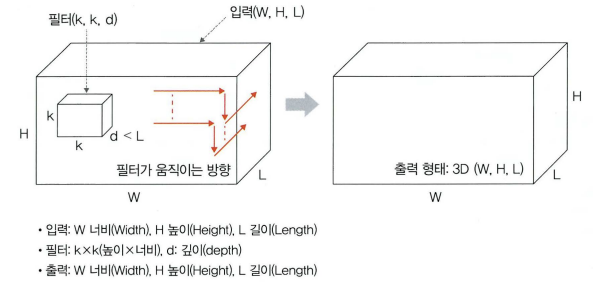

####**3D 입력을 갖는 2D 합성곱**
- 필터의 길이가 입력 채널의 길이과 같아서
- 3D 형태가 입력됐음에도 2D 합성곱이 출력됨.
- 입력(W, H, L) -필터(k, k, L)-> 출력(W, H)
- LeNet-5, VGG이 이런 합성곱을 사용


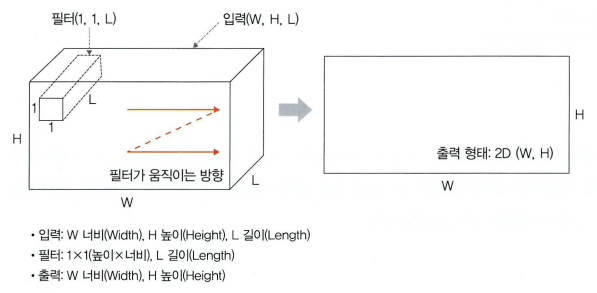

####**1x1 합성곱**
- 3D 입력을 갖는 2D 합성곱 중 특수 케이스
- 입력(W, H, L) -필터(1, 1, L)-> 출력(W, H)
- 1x1 합성곱에서 채널 수를 조정해서 연산량이 감소되는 효과가 있음.
- 대표적으로 GoogLeNet이 1x1 합성곱을 사용.